#
#
# INSTACART Grocery basket analysis
#### Analyst: Diana Postica
#
#
## Contents

### 1. Import Dataframe
### 2. Secutity Implications
### 3. Customer Behaviour In Different Geographic Areas
#### 3.1 Spending Habits By Region
#### 3.2 Brand Loyalty By Region
### 4. Customer Activity Segmentation
### 5. Most Popular Departments and Products
#### 5.1Top Departments
#### 5.2 Top Products
### 6. Customer Profiling
#### 6.1 Order Habits In Conjunction With Age Group And Family Status
- Create Age Groups
- Find The Relationship Between Age, Marital Status,And Spending Habits
- Consumption Distribution By Family Status
- Products Consumed According To Family Status
- Consumption Distribution By Age
#### 6.2 Order Habits In Conjunction With Income
### 7. Customers Loyalty Status
### 8. Spending Habits Depending On The Time Of The Day 


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Dataframe

In [2]:
# Save the folder's adress in the 'path' object
path=(r'C:\Users\Admin\Desktop\Data Tasks\Data Immersion\Achievement 4\Instacart Basket Analysis\02 data')

In [3]:
# Import departments df
df_dep=pd.read_csv(os.path.join(path,'Prepared Data','departments_wrangled.csv'),index_col=0)

In [3]:
# Import the most current version of df_ords_prods_cust_merged as df for easier reading 
df=pd.read_pickle(os.path.join(path,'Prepared Data','df_ords_prods_cust_merged.pkl'))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Desktop\\Data Tasks\\Data Immersion\\Achievement 4\\Instacart Basket Analysis\\02 data\\Prepared Data\\df_ords_prods_cust_merged.pkl'

In [5]:
# Check memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 object 
 2   order_number            int8   
 3   orders_day_of_week      int8   
 4   order_hour_of_day       int8   
 5   days_since_prior_order  float16
 6   product_id              int32  
 7   add_to_cart_order       int32  
 8   reordered               int8   
 9   product_name            object 
 10  aisle_id                int16  
 11  department_id           int8   
 12  prices                  float32
 13  price_label             object 
 14  busiest_days            object 
 15  busiest_period_of_day   object 
 16  max_order               int8   
 17  loyalty_flag            object 
 18  prices_mean             float32
 19  spending_flag           object 
 20  order_median            float16
 21  frequency_flag          objec

In [6]:
# Reduce memory usage
df['prices_mean']=df['prices_mean'].astype('float16')
df['age']=df['age'].astype('int8')
df['n_dependants']=df['n_dependants'].astype('int8')
df['income']=df['income'].astype('int32')

In [7]:
# Check memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 object 
 2   order_number            int8   
 3   orders_day_of_week      int8   
 4   order_hour_of_day       int8   
 5   days_since_prior_order  float16
 6   product_id              int32  
 7   add_to_cart_order       int32  
 8   reordered               int8   
 9   product_name            object 
 10  aisle_id                int16  
 11  department_id           int8   
 12  prices                  float32
 13  price_label             object 
 14  busiest_days            object 
 15  busiest_period_of_day   object 
 16  max_order               int8   
 17  loyalty_flag            object 
 18  prices_mean             float16
 19  spending_flag           object 
 20  order_median            float16
 21  frequency_flag          objec

# Security Implications

In [8]:
# View dataframe
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_median,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [9]:
# List the columns in the dataframe
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'prices_mean',
       'spending_flag', 'order_median', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

#### As seen above, the data frame includes information such as customers' location, age, gender, family status and income. Since this information contains so much personal detail, it can be easily tracked and found. We initially had access to customers' first and last names in this dataframe, but due to customers' security and privacy priority, those columns were excluded. Without both, data security is ensured and analysis is still unaffected as we have the user_id column sufficient to run healthy and secure insights.

#  Customer Behavior In Different Geographic Areas

In [10]:
# Create flag for different geographic areas in USA
df.loc[df['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'geographic_area'] = 'Northeast'

In [11]:
df.loc[df['state'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']), 'geographic_area'] = 'Midwest'

In [12]:
df.loc[df['state'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']), 'geographic_area'] = 'South'

In [13]:
df.loc[df['state'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']), 'geographic_area'] = 'West'

In [14]:
# Count the users across reagions
df['geographic_area'].value_counts(dropna=False)

geographic_area
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## Spending Habits by Region

In [15]:
# Display the users according to their spending habits
crosstab = pd.crosstab(df['geographic_area'], df['spending_flag'], dropna = False)
crosstab

spending_flag,High spender,Low spender
geographic_area,,
Midwest,155932,7441350
Northeast,108180,5614511
South,209481,10582194
West,160271,8132559


<Axes: xlabel='geographic_area'>

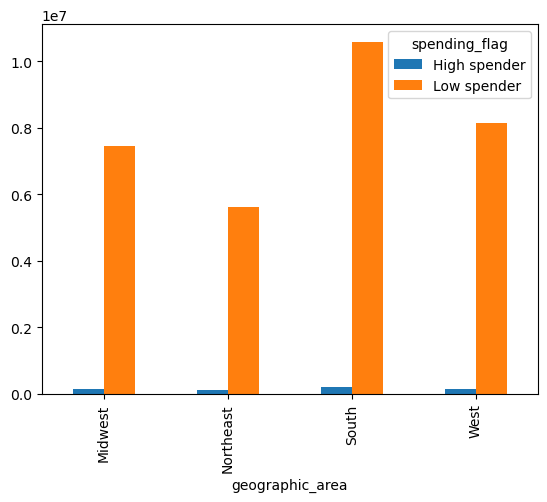

In [16]:
# Visualize the results with the help of a bar chart
crosstab.plot(kind='bar')

In [17]:
#for a better understanding of the data transfor the results to percentage
perctable=crosstab.div(crosstab.sum(axis=1),axis=0)*100
perctable

spending_flag,High spender,Low spender
geographic_area,,
Midwest,2.052471,97.947529
Northeast,1.890369,98.109631
South,1.941135,98.058865
West,1.932645,98.067355


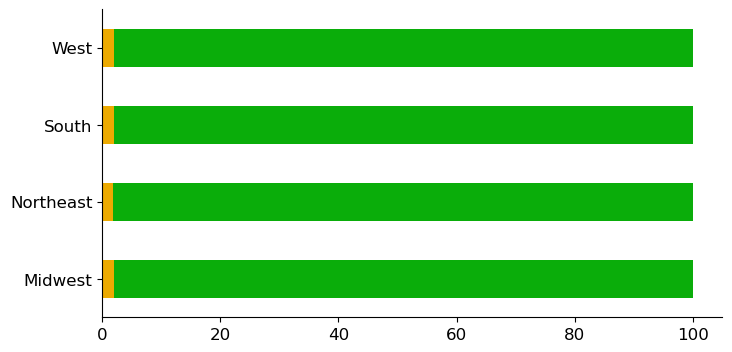

In [18]:
# Call the barchart this time horizontally and with %
spending_flag_bar=perctable.plot(kind='barh',stacked=True,color=['#ECAA01','#0AAD0A'],figsize=(8, 4),legend=None)

# Remove y-label
spending_flag_bar.set_ylabel('')

# Set the font size for tick labels
spending_flag_bar.tick_params(axis='both', labelsize=12)

# Remove borderlines
spending_flag_bar.spines['top'].set_visible(False)
spending_flag_bar.spines['right'].set_visible(False)

In [19]:
#Export the chart as png file
spending_flag_bar.figure.savefig(r'C:\Users\Admin\Desktop\Data Tasks\Data Immersion\Achievement 4\Instacart Basket Analysis\04 Analysis\Visualizations\spending_flag_bar.png',bbox_inches='tight',facecolor='#FAF1E5',dpi=200,transparent=True)

## Brand Loyalty by Region

In [26]:
df_high['frequency_flag'].value_counts()

frequency_flag
Frequent customer        21204476
Regular customer          6865113
Non-frequent customer     2894975
Name: count, dtype: int64

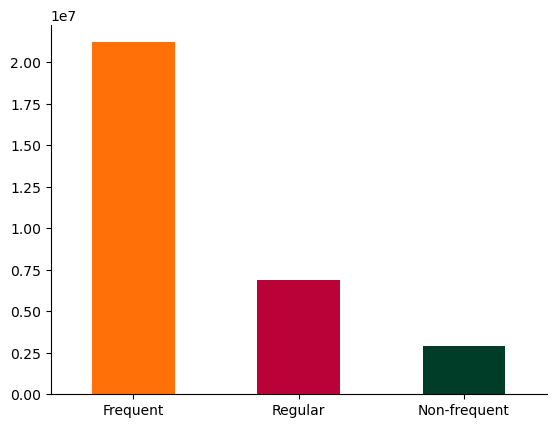

In [91]:
bar_frequency_flag_counts=df_high['frequency_flag'].value_counts().plot.bar(color=['#FF7009','#BA0239','#003D29'])

# # Remove x-label
bar_frequency_flag_counts.set_xlabel('')

# Set custom labels for the x-axis
department_name=['Frequent','Regular','Non-frequent']
bar_frequency_flag_counts.set_xticklabels(department_name, rotation=0)

# Remove borderlines
bar_frequency_flag_counts.spines['top'].set_visible(False)
bar_frequency_flag_counts.spines['right'].set_visible(False)

In [92]:
#Export the chart as png file
bar_frequency_flag_counts.figure.savefig(r'C:\Users\Admin\Desktop\Data Tasks\Data Immersion\Achievement 4\Instacart Basket Analysis\04 Analysis\Visualizations\bar_frequency_flag_counts.png',bbox_inches='tight',facecolor='#FAF1E5',dpi=200,transparent=True)

In [29]:
crosstab_frequency_flag=pd.crosstab(df['geographic_area'], df['frequency_flag'], dropna = False)
crosstab_frequency_flag

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
geographic_area,,,
Midwest,5017709,863419,1716197
Northeast,3804566,630182,1287988
South,7192372,1215088,2384420
West,5545206,927748,1819959


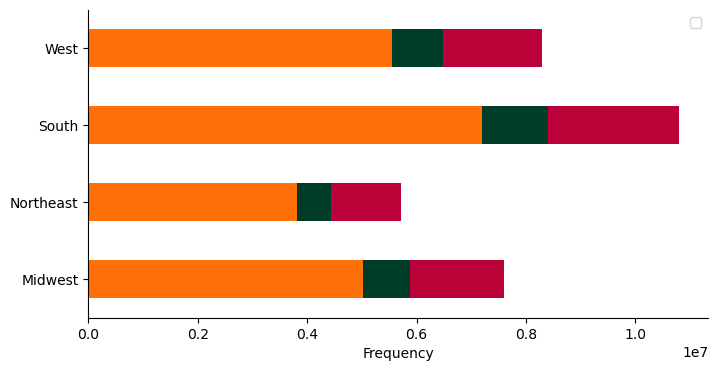

In [89]:
#calling the barchart this time horizontally and with %
barh_frequency_regions=crosstab_frequency_flag.plot(kind='barh',stacked=True,color=['#FF7009','#003D29','#BA0239'],figsize=(8, 4))

# Remove y-label
barh_frequency_regions.set_ylabel('')

# Set the x-axis label to "Frequency"
plt.xlabel('Frequency')

plt.legend('')

# Remove borderlines
barh_frequency_regions.spines['top'].set_visible(False)
barh_frequency_regions.spines['right'].set_visible(False)

In [31]:
#Export the chart as png file
barh_frequency_regions.figure.savefig(r'C:\Users\Admin\Desktop\Data Tasks\Data Immersion\Achievement 4\Instacart Basket Analysis\04 Analysis\Visualizations\barh_frequency_regions.png',bbox_inches='tight',facecolor='#FAF1E5',dpi=200,transparent=True)

# Customer Activity Segmentation

In [21]:
# Create a flag to mark the customers with a number of orders smaller than 5
low_activity=df.loc[df['max_order']< 5, 'customer_activity'] = 'Low activity'

In [22]:
# Create a flag to mark the customers with number of orders greater or equal to 5
high_activity=df.loc[df['max_order']>= 5, 'customer_activity'] = 'High activity'

In [23]:
# Check the new column
df[['max_order','customer_activity']]

,max_order,customer_activity
0,10,High activity
1,10,High activity
2,10,High activity
3,10,High activity
4,10,High activity
...,...,...
32404854,26,High activity
32404855,4,Low activity
32404856,4,Low activity
32404857,4,Low activity


In [24]:
# Display the distribution of activity
df['customer_activity'].value_counts()

customer_activity
High activity    30964564
Low activity      1440295
Name: count, dtype: int64

In [25]:
# Create a subset with the high activity
df_high=df[df['customer_activity']=='High activity']

In [32]:
df_high.shape

(30964564, 31)

In [ ]:
# Export new dataframe 
df_high.to_pickle(os.path.join(path,'Prepared Data','df_high_activity_cust.pkl'))

# Most Popular Departments and Products

## Top Departments

In [33]:
# Display all the departments
df_dep

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


<Axes: xlabel='department_id'>

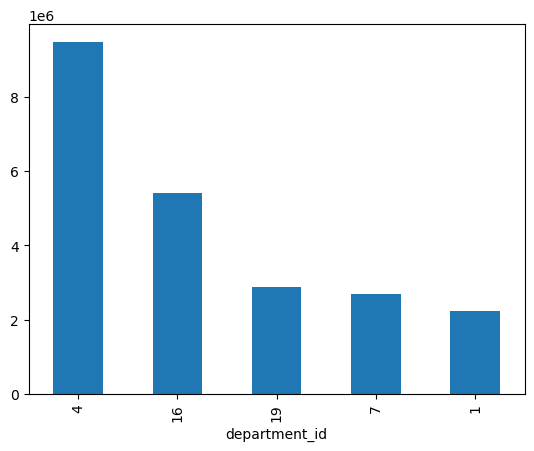

In [34]:
# Find top 5 departments with the highest sales
df['department_id'].value_counts().head(5).plot.bar()

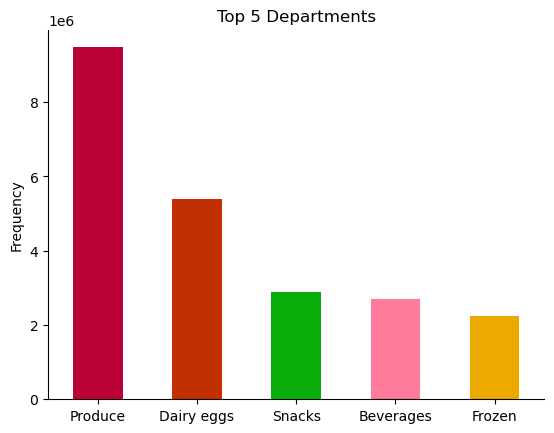

In [35]:
# Customize the chart
bar_top_departments=df['department_id'].value_counts().head(5).plot.bar(color=['#BA0239','#C22F00','#0AAD0A','#FF7A9B','#ECAA01'])

# Set the y-axis label to "Frequency"
plt.ylabel('Frequency')

# Remove x-label
bar_top_departments.set_xlabel('')

# Give the chart a title
plt.title('Top 5 Departments')

# Define the week day names
department_name = ['Produce','Dairy eggs','Snacks','Beverages','Frozen']

# Set custom labels for the x-axis
positions = range(len(department_name))
bar_top_departments.set_xticks(positions)
bar_top_departments.set_xticklabels(department_name, rotation=0)

# Remove borderlines
bar_top_departments.spines['top'].set_visible(False)
bar_top_departments.spines['right'].set_visible(False)


In [36]:
#Export  the chart as png file
bar_top_departments.figure.savefig(r'C:\Users\Admin\Desktop\Data Tasks\Data Immersion\Achievement 4\Instacart Basket Analysis\04 Analysis\Visualizations\bar_top_departments.png',bbox_inches='tight',facecolor='#FAF1E5',dpi=200,transparent=True)

In [ ]:
df_high.groupby('department_id').agg({'product_name':['mean']})

In [159]:
df_high.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'prices_mean',
       'spending_flag', 'order_median', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'geographic_area', 'customer_activity', 'age_group', 'income_power'],
      dtype='object')

## Top Products

In [117]:
df_high['product_name'].value_counts().head(10)

product_name
Banana                    453164
Bag of Organic Bananas    366403
Organic Strawberries      255988
Organic Baby Spinach      231772
Organic Hass Avocado      206799
Organic Avocado           168267
Large Lemon               145397
Strawberries              136330
Limes                     134751
Organic Whole Milk        133514
Name: count, dtype: int64

In [119]:
df_high['product_name'].value_counts().head(10).to_clipboard()

# Customer Profiling
To achieve more relevant results, the dataframe with high activity customers will be used.

In [37]:
# Calculate the total number of customers
df_high['user_id'].nunique()

162631

In [38]:
# Check descriptive statostics
df_high['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

## Order Habits in Conjuction with Age Group and Family Status 

###  Age Groups

In [40]:
df_high.loc[df_high['age'] <=35, 'age_group'] = 'Young adult'

C:\Users\Admin\AppData\Local\Temp\ipykernel_8148\4226742568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[df_high['age'] <=35, 'age_group'] = 'Young adult'


In [41]:
df_high.loc[(df_high['age'] >36) & (df_high['age'] <=50), 'age_group'] = 'Middle aged adult'

In [42]:
df_high.loc[(df_high['age'] >51) & (df_high['age'] <=65), 'age_group'] = 'Senior adult'

In [43]:
df_high.loc[df_high['age'] >66, 'age_group'] = 'Elderly adult'

In [44]:
df_high['age_group'].value_counts()

age_group
Young adult          8738805
Elderly adult        7276230
Middle aged adult    6817611
Senior adult         6724447
Name: count, dtype: int64

In [45]:
df_high['age_group'].value_counts().to_clipboard()

### Relationship between Age, Marital Status, and Spending Habits

In [121]:
crosstab_age_fam_stat = pd.crosstab(df_high['age_group'], df_high['fam_status'], dropna = False)

In [47]:
crosstab_age_fam_stat

fam_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Elderly adult,1798722,0,5477508,0
Middle aged adult,0,0,5130447,1687164
Senior adult,739550,0,4990640,994257
Young adult,0,1481172,5079943,2177690


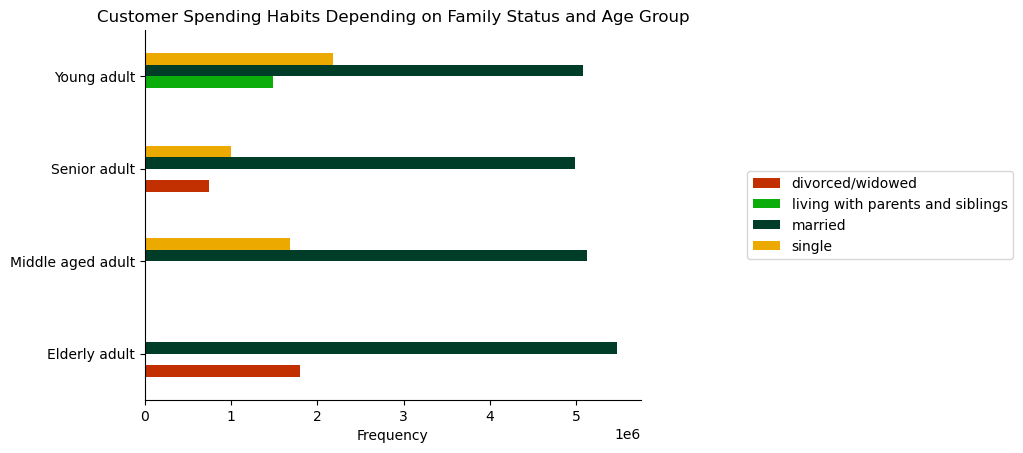

In [48]:
# Create and customize the chart
barh_spending_habit=crosstab_age_fam_stat.plot.barh(color=['#C22F00','#0AAD0A','#003D29','#ECAA01'])

# Remove y-label
plt.ylabel('')

# Set the x-axis label to "Frequency"
plt.xlabel('Frequency')

# Give the chart a title
plt.title('Customer Spending Habits Depending on Family Status and Age Group')

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))

# Remove borderlines
barh_spending_habit.spines['top'].set_visible(False)
barh_spending_habit.spines['right'].set_visible(False)


In [49]:
#Export  the chart as png file
barh_spending_habit.figure.savefig(r'C:\Users\Admin\Desktop\Data Tasks\Data Immersion\Achievement 4\Instacart Basket Analysis\04 Analysis\Visualizations\barh_spending_habit.png',bbox_inches='tight',facecolor='#FAF1E5',dpi=200,transparent=True)

### Consumption Distribution by Family Status

In [50]:
df_high.groupby('fam_status').agg({'prices':'sum'}).sort_values(by='prices', ascending=False)


,prices
fam_status,
married,169362208.0
single,39647128.0
divorced/widowed,20632364.0
living with parents and siblings,11552531.0


In [51]:
perc_prices = df_high.groupby('fam_status').agg({'prices':'sum'}).sort_values(by='prices', ascending=False)

# Calculate the total sum of prices
total_prices_sum = perc_prices['prices'].sum()

# Calculate the percentages of each group's contribution
perc_prices['percentage'] = (perc_prices['prices'] / total_prices_sum) * 100

# Display the result with percentages
print(perc_prices)


                                       prices  percentage
fam_status                                               
married                           169362208.0   70.218185
single                             39647128.0   16.437841
divorced/widowed                   20632364.0    8.554253
living with parents and siblings   11552531.0    4.789721


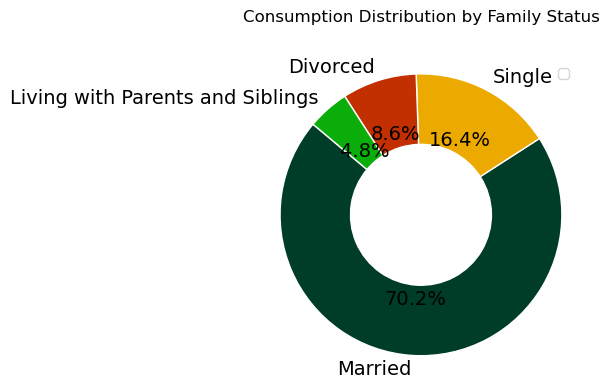

In [52]:
# Create a donut chart
plt.figure(figsize=(4,4))
pie_revenue_fam_status=plt.pie(perc_prices['percentage'], 
                               labels=['Married','Single','Divorced','Living with Parents and Siblings'],
                               autopct='%1.1f%%', 
                               startangle=140,
                               colors=['#003D29','#ECAA01','#C22F00','#0AAD0A'],
                               wedgeprops={'width': 0.5, 'edgecolor': 'w'},
                               textprops={'fontsize': 14})


plt.title('Consumption Distribution by Family Status',y=1.1)

plt.legend('')

plt.savefig(r'C:\Users\Admin\Desktop\Data Tasks\Data Immersion\Achievement 4\Instacart Basket Analysis\04 Analysis\Visualizations\pie_revenue_fam_status.png',bbox_inches='tight',facecolor='#FAF1E5',dpi=200,transparent=True)

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [53]:
orders_day_of_week_fam_stat = pd.crosstab(df_high['orders_day_of_week'], df_high['fam_status'], dropna = False)

In [54]:
orders_day_of_week_fam_stat

fam_status,divorced/widowed,living with parents and siblings,married,single
orders_day_of_week,,,,
0,502506,280828,4150704,974572
1,459198,259482,3789854,903152
2,343839,192366,2829759,658742
3,315320,174418,2578075,601722
4,306704,173214,2546521,598555
5,348434,195460,2824095,665740
6,369270,205404,3024703,691927


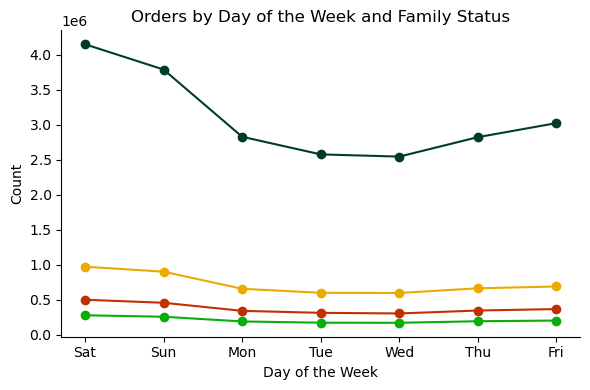

In [55]:
# Define the x-axis values (days of the week)
days_of_week = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Define custom colors for the lines
custom_colors =['#C22F00','#0AAD0A','#003D29','#ECAA01']

# Create a line chart from the crosstab
plt.figure(figsize=(6, 4))
for i, column in enumerate(orders_day_of_week_fam_stat.columns):
    plt.plot(days_of_week, orders_day_of_week_fam_stat[column], marker='o', label=column,color=custom_colors[i % len(custom_colors)]  # Cycle through custom colors
    )

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Orders by Day of the Week and Family Status')

# Remove the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the chart to a file (e.g., PNG format)
plt.savefig(r'C:\Users\Admin\Desktop\Data Tasks\Data Immersion\Achievement 4\Instacart Basket Analysis\04 Analysis\Visualizations\line_orders_day_of_week_fam_stat.png',bbox_inches='tight',facecolor='#FAF1E5',dpi=200,transparent=True)

# Show the line chart
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()


### Products Consumed According to Family Status

In [137]:
df_high['fam_status'].value_counts()

fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [138]:
#Group by family status
group_period_of_day=df_high.groupby('fam_status')

In [139]:
group_period_of_day['product_name'].value_counts().loc['married'].head(10)

product_name
Banana                    317498
Bag of Organic Bananas    257309
Organic Strawberries      179661
Organic Baby Spinach      162724
Organic Hass Avocado      145250
Organic Avocado           118714
Large Lemon               102192
Strawberries               95896
Limes                      94474
Organic Whole Milk         94046
Name: count, dtype: int64

In [140]:
group_period_of_day['product_name'].value_counts().loc['single'].head(10)

product_name
Banana                    75054
Bag of Organic Bananas    60233
Organic Strawberries      42036
Organic Baby Spinach      38600
Organic Hass Avocado      34177
Organic Avocado           27644
Large Lemon               24148
Strawberries              22908
Limes                     22432
Organic Whole Milk        21941
Name: count, dtype: int64

In [141]:
group_period_of_day['product_name'].value_counts().loc['divorced/widowed'].head(10)

product_name
Banana                    38556
Bag of Organic Bananas    31553
Organic Strawberries      22419
Organic Baby Spinach      19328
Organic Hass Avocado      18068
Organic Avocado           13907
Large Lemon               12288
Organic Raspberries       12060
Limes                     11485
Organic Whole Milk        11256
Name: count, dtype: int64

In [143]:
group_period_of_day['product_name'].value_counts().loc['living with parents and siblings'].head(10)

product_name
Banana                    22056
Bag of Organic Bananas    17308
Organic Strawberries      11872
Organic Baby Spinach      11120
Organic Hass Avocado       9304
Organic Avocado            8002
Large Lemon                6769
Limes                      6360
Strawberries               6345
Organic Whole Milk         6271
Name: count, dtype: int64

### Consumption Distribution by Age

In [56]:
df_high.groupby('age_group').agg({'prices':'sum'}).sort_values(by='prices', ascending=False)

,prices
age_group,
Young adult,68014040.0
Elderly adult,56687136.0
Middle aged adult,53152816.0
Senior adult,52361476.0


In [57]:
perc_prices_age = df_high.groupby('age_group').agg({'prices':'sum'}).sort_values(by='prices', ascending=False)

# Calculate the total sum of prices
total_prices_sum = perc_prices_age['prices'].sum()

# Calculate the percentages of each group's contribution
perc_prices_age['percentage'] = (perc_prices_age['prices'] / total_prices_sum) * 100

# Display the result with percentages
print(perc_prices_age)


                       prices  percentage
age_group                                
Young adult        68014040.0   29.543648
Elderly adult      56687136.0   24.623514
Middle aged adult  53152816.0   23.088291
Senior adult       52361476.0   22.744553


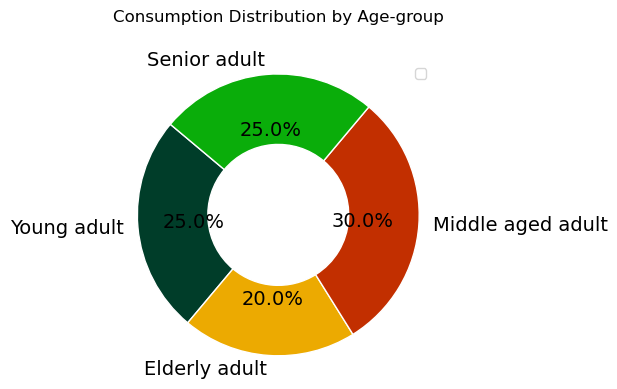

In [79]:
# Create a donut chart
plt.figure(figsize=(4, 4))
pie_revenue_age=plt.pie(perc_prices_age['percentage'], 
                               labels=['Young adult','Elderly adult','Middle aged adult','Senior adult'],
                               autopct='%1.1f%%', 
                               startangle=140,
                               colors=['#003D29','#ECAA01','#C22F00','#0AAD0A'],
                               wedgeprops={'width': 0.5, 'edgecolor': 'w'},
                               textprops={'fontsize': 14})


plt.title('Consumption Distribution by Age-group',y=1.1)

plt.legend('')

plt.savefig(r'C:\Users\Admin\Desktop\Data Tasks\Data Immersion\Achievement 4\Instacart Basket Analysis\04 Analysis\Visualizations\pie_revenue_age.png',bbox_inches='tight',facecolor='#FAF1E5',dpi=200,transparent=True)

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Order Habits in Conjuction with Income

In [59]:
# Check descriptive statostics
df_high['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [60]:
# Find mode
df_high['income'].mode()

0    72344
Name: income, dtype: int32

### Create an Income Flag

In [61]:
df_high.loc[df_high['income'] <=40000, 'income_power'] = 'Low income'

C:\Users\Admin\AppData\Local\Temp\ipykernel_8148\3063953979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high.loc[df_high['income'] <=40000, 'income_power'] = 'Low income'


In [62]:
df_high.loc[(df_high['income'] >40000) & (df_high['income'] <=150000), 'income_power'] = 'Middle income'

In [63]:
df_high.loc[df_high['income'] >150000, 'income_power'] = 'High income'

In [64]:
# Check new column
df_high['income_power'].value_counts()

income_power
Middle income    25458005
High income       3894534
Low income        1612025
Name: count, dtype: int64

# Customer’s Loyalty Status

In [65]:
df_high.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_label', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'prices_mean',
       'spending_flag', 'order_median', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'geographic_area', 'customer_activity', 'age_group', 'income_power'],
      dtype='object')

In [ ]:
df_high.groupby('loyalty_flag').agg({'order_number':['max','mean']})

In [66]:
loyalty_flag_descriptive=df_high.groupby('loyalty_flag').agg({'order_number':['max','mean']})
loyalty_flag_descriptive

order_number           
                          max       mean
loyalty_flag                            
Loyal customer             99  32.641196
New customer               10   4.268295
Regular customer           40  12.347452

In [67]:
loyalty_flag_descriptive.to_clipboard()

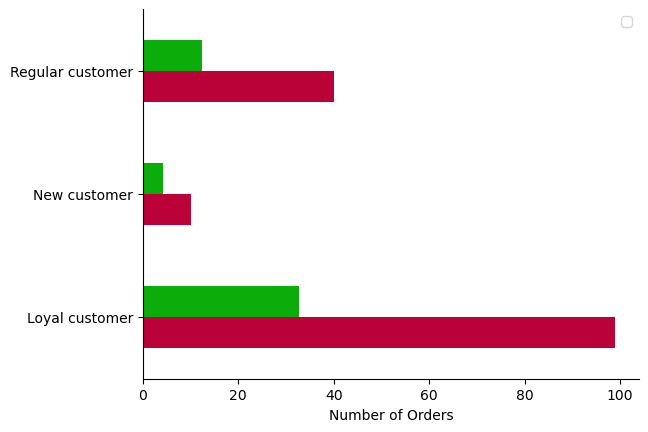

In [68]:
barh_loyalty_flag_descriptive=df_high.groupby('loyalty_flag').agg({'order_number':['max','mean']}).plot.barh(color=['#BA0239','#0AAD0A'])

# Remove y-label
plt.ylabel('')

# Set the x-axis label to "Number of Orders"
plt.xlabel('Number of Orders')

# Add labels and title

plt.legend('')

# Remove borderlines
barh_loyalty_flag_descriptive.spines['top'].set_visible(False)
barh_loyalty_flag_descriptive.spines['right'].set_visible(False)


In [69]:
#Export  the chart as png file
barh_loyalty_flag_descriptive.figure.savefig(r'C:\Users\Admin\Desktop\Data Tasks\Data Immersion\Achievement 4\Instacart Basket Analysis\04 Analysis\Visualizations\barh_loyalty_flag_descriptive.png',bbox_inches='tight',facecolor='#FAF1E5',dpi=200,transparent=True)

In [70]:
# Calculate the loyalty distribution
pie_loyalty=df_high['loyalty_flag'].value_counts(normalize=True)
pie_loyalty

loyalty_flag
Regular customer    0.512740
Loyal customer      0.332125
New customer        0.155135
Name: proportion, dtype: float64

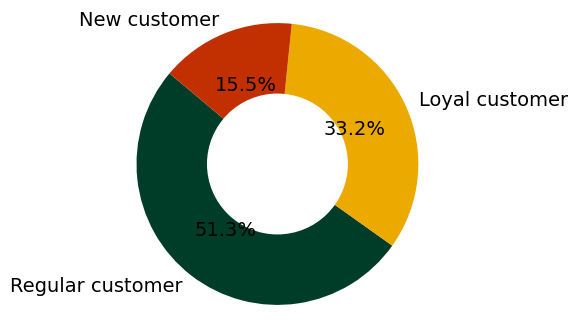

In [101]:
# Create a donut chart
plt.figure(figsize=(4, 4))

# Define colors for the pie chart
colors = ['#003D29','#ECAA01','#C22F00']

# Create the outer pie chart and get the wedges
outer_pie= plt.pie(pie_loyalty, labels=pie_loyalty.index, autopct='%1.1f%%', colors=colors, startangle=140,textprops={'fontsize': 14})

# Create a white circle in the center to create the donut effect
center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Display the donut chart
plt.axis('equal')  # Equal aspect ratio ensures the chart is circular.

# Save as png
plt.savefig(r'C:\Users\Admin\Desktop\Data Tasks\Data Immersion\Achievement 4\Instacart Basket Analysis\04 Analysis\Visualizations\pie_loyalty.png',bbox_inches='tight',facecolor='#FAF1E5',dpi=200,transparent=True)


plt.show()


# Spending Habits Depending on the Time of the Day

In [128]:
# Show how many products sell during specific hours
df_high['busiest_period_of_day'].value_counts()

busiest_period_of_day
Most orders       20180856
Average orders     9550810
Fewest orders      1232898
Name: count, dtype: int64

In [129]:
# Copy to clipboard
df_high['busiest_period_of_day'].value_counts().to_clipboard()

In [130]:
# Group by period of the day
group_period_of_day=df_high.groupby('busiest_period_of_day')

In [134]:
# Show what products sell the most in the busiest period of the day
group_period_of_day['product_name'].value_counts().loc['Most orders'].head(10)

product_name
Banana                    291271
Bag of Organic Bananas    235255
Organic Strawberries      161737
Organic Baby Spinach      148843
Organic Hass Avocado      133268
Organic Avocado           109739
Large Lemon                97039
Limes                      90242
Strawberries               87835
Organic Raspberries        84219
Name: count, dtype: int64

In [135]:
# Show what products sell the most when there is an average number of orders placed
group_period_of_day['product_name'].value_counts().loc['Average orders'].head(10)

product_name
Banana                    144816
Bag of Organic Bananas    116081
Organic Strawberries       83709
Organic Baby Spinach       73259
Organic Hass Avocado       65504
Organic Avocado            52155
Organic Whole Milk         44195
Organic Raspberries        43324
Strawberries               42959
Large Lemon                42891
Name: count, dtype: int64

In [136]:
# Show what products sell the most when fewest number of orders are placed
group_period_of_day['product_name'].value_counts().loc['Fewest orders'].head(10)

product_name
Banana                    17077
Bag of Organic Bananas    15067
Organic Strawberries      10542
Organic Baby Spinach       9670
Organic Hass Avocado       8027
Organic Avocado            6373
Strawberries               5536
Large Lemon                5467
Organic Raspberries        5402
Organic Whole Milk         5372
Name: count, dtype: int64